# Least Angle Regression (LARS)

Least-angle regression (LARS) is a regression algorithm for high-dimensional data, developed by Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani. LARS is similar to forward stepwise regression. At each step, it finds the feature most correlated with the target. When there are multiple features having equal correlation, instead of continuing along the same feature, it proceeds in a direction equiangular between the features.

## LARS Lasso

[LassoLars](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLars.html#sklearn.linear_model.LassoLars) is a lasso model implemented using the LARS algorithm, and unlike the implementation based on coordinate descent, this yields the exact solution, which is piecewise linear as a function of the norm of its coefficients.

In [1]:
from sklearn import linear_model
reg = linear_model.LassoLars(alpha=.1)
reg.fit([[0, 0], [1, 1]], [0, 1])
reg.coef_

array([0.6, 0. ])

### This example shows how to compute the “paths” of coefficients along the Lasso, Lasso-LARS, and Elastic Net regularization paths. In other words, it shows the relationship between the regularization parameter (alpha) and the coefficients.

Computing regularization path using the lasso...
Computing regularization path using the positive lasso...
Computing regularization path using the LARS...
Computing regularization path using the positive LARS...
Computing regularization path using the elastic net...
Computing regularization path using the positive elastic net...


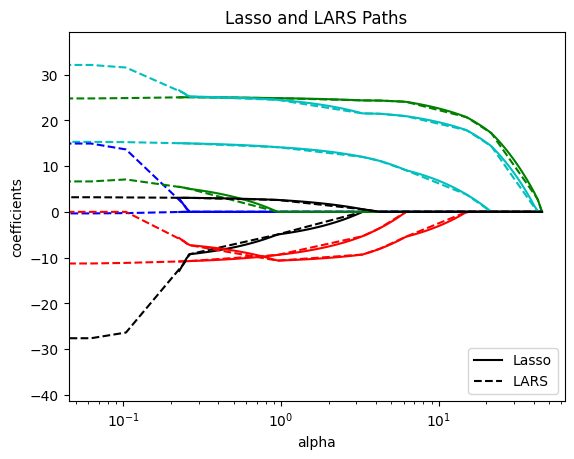

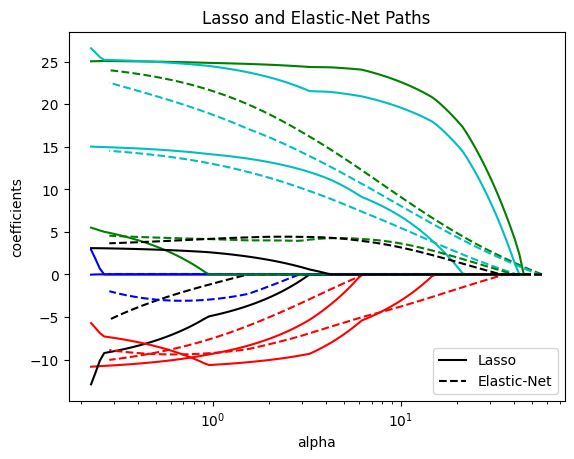

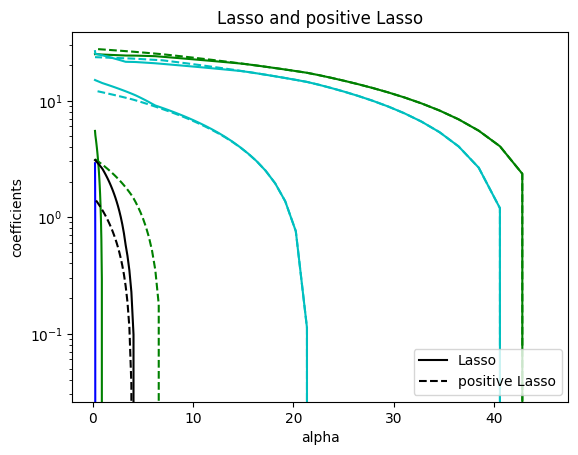

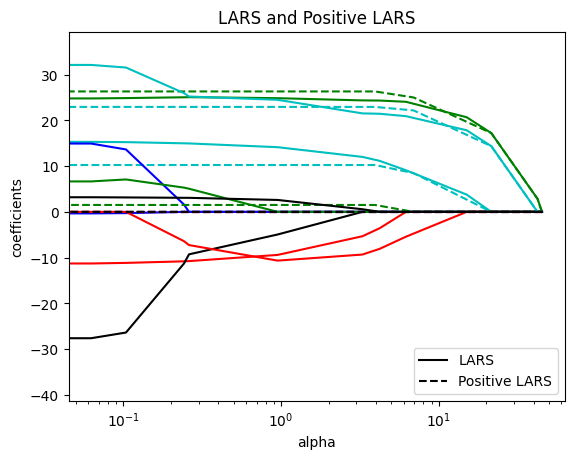

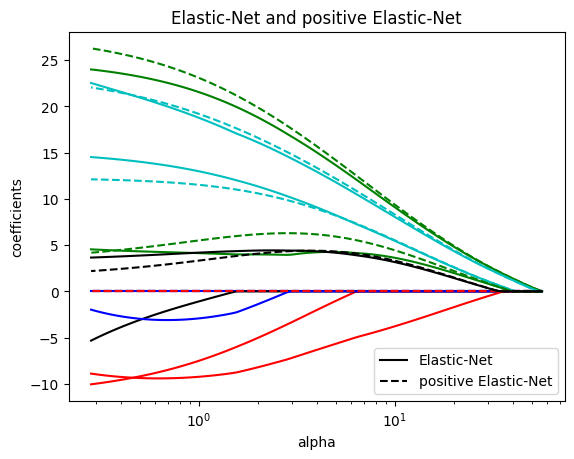

In [3]:
from itertools import cycle

import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.linear_model import enet_path, lars_path, lasso_path

X, y = load_diabetes(return_X_y=True)
X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)

# Compute paths

eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps)

print("Computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
    X, y, eps=eps, positive=True
)

print("Computing regularization path using the LARS...")
alphas_lars, _, coefs_lars = lars_path(X, y, method="lasso")

print("Computing regularization path using the positive LARS...")
alphas_positive_lars, _, coefs_positive_lars = lars_path(
    X, y, method="lasso", positive=True
)

print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8)

print("Computing regularization path using the positive elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, positive=True
)

# Display results

plt.figure(1)
colors = cycle(["b", "r", "g", "c", "k"])
for coef_lasso, coef_lars, c in zip(coefs_lasso, coefs_lars, colors):
    l1 = plt.semilogx(alphas_lasso, coef_lasso, c=c)
    l2 = plt.semilogx(alphas_lars, coef_lars, linestyle="--", c=c)

plt.xlabel("alpha")
plt.ylabel("coefficients")
plt.title("Lasso and LARS Paths")
plt.legend((l1[-1], l2[-1]), ("Lasso", "LARS"), loc="lower right")
plt.axis("tight")

plt.figure(2)
colors = cycle(["b", "r", "g", "c", "k"])
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.semilogx(alphas_lasso, coef_l, c=c)
    l2 = plt.semilogx(alphas_enet, coef_e, linestyle="--", c=c)

plt.xlabel("alpha")
plt.ylabel("coefficients")
plt.title("Lasso and Elastic-Net Paths")
plt.legend((l1[-1], l2[-1]), ("Lasso", "Elastic-Net"), loc="lower right")
plt.axis("tight")


plt.figure(3)
for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    l1 = plt.semilogy(alphas_lasso, coef_l, c=c)
    l2 = plt.semilogy(alphas_positive_lasso, coef_pl, linestyle="--", c=c)

plt.xlabel("alpha")
plt.ylabel("coefficients")
plt.title("Lasso and positive Lasso")
plt.legend((l1[-1], l2[-1]), ("Lasso", "positive Lasso"), loc="lower right")
plt.axis("tight")


plt.figure(4)
colors = cycle(["b", "r", "g", "c", "k"])
for coef_lars, coef_positive_lars, c in zip(coefs_lars, coefs_positive_lars, colors):
    l1 = plt.semilogx(alphas_lars, coef_lars, c=c)
    l2 = plt.semilogx(alphas_positive_lars, coef_positive_lars, linestyle="--", c=c)

plt.xlabel("alpha")
plt.ylabel("coefficients")
plt.title("LARS and Positive LARS")
plt.legend((l1[-1], l2[-1]), ("LARS", "Positive LARS"), loc="lower right")
plt.axis("tight")

plt.figure(5)
for coef_e, coef_pe, c in zip(coefs_enet, coefs_positive_enet, colors):
    l1 = plt.semilogx(alphas_enet, coef_e, c=c)
    l2 = plt.semilogx(alphas_positive_enet, coef_pe, linestyle="--", c=c)

plt.xlabel("alpha")
plt.ylabel("coefficients")
plt.title("Elastic-Net and positive Elastic-Net")
plt.legend((l1[-1], l2[-1]), ("Elastic-Net", "positive Elastic-Net"), loc="lower right")
plt.axis("tight")
plt.show()